In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



## Data Loading

In [32]:
train = pd.read_csv('./datasets/mnist_train.csv',header=None)
test = pd.read_csv('./datasets/mnist_test.csv',header=None)

train.rename({0:"label"},axis=1,inplace=True)
test.rename({0:"label"},axis=1,inplace=True)

train.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data permutation

The files containing the 70'000 images is quite heavy, and I also wanted to make sure that I know the permutation for some trials messing with the MLP weights. I could have probably inferred it from the pictures (at least the permutations of all pixels containing at least one none-0 value), but I chose to cheat and shuffle the dataset myself to save my poor hard-drive :D


In [33]:
normalized_train = ((train-train.min())/(train.max()-train.min())).fillna(0)
normalized_test = ((test-test.min())/(test.max()-test.min())).fillna(0)

x_train = normalized_train.iloc[:,1:].copy()
x_test = normalized_test.iloc[:,1:].copy()

y_train = train.loc[:,"label"]
y_test = test.loc[:,"label"]

x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
x_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
permutation = list(x_train.columns)

random.shuffle(permutation)

x_permuted_train = x_train[permutation]
x_permuted_train.columns = range(1,x_permuted_train.columns.size+1)

x_permuted_test = x_test[permutation]
x_permuted_test.columns = range(1,x_permuted_test.columns.size+1)

In [36]:
x_permuted_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.25098,0.0,0.0,0.0,0.0,0.000000,0.521569,0.0,0.0,0.000000,...,0.000000,0.992157,0.0,0.0,0.0,0.992157,0.992157,0.000000,0.0,0.000000
1,0.00000,0.0,0.0,0.0,0.0,0.000000,0.552941,0.0,0.0,0.333333,...,0.000000,0.988235,0.0,0.0,0.0,0.988235,0.000000,0.000000,0.0,0.698039
2,0.00000,0.0,0.0,0.0,0.0,0.905882,0.000000,0.0,0.0,0.694118,...,0.996078,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.623529,0.0,0.000000
3,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.862745,0.000000,0.000000,0.0,0.000000
4,0.00000,0.0,0.0,0.0,0.0,0.309804,0.000000,0.0,0.0,0.000000,...,0.000000,0.992157,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.992157


In [43]:
x_train_reshaped=x_train.copy().values.reshape(-1,28,28,1)
x_test_reshaped=x_test.copy().values.reshape(-1,28,28,1)
x_train_permuted_reshaped=x_permuted_train.copy().values.reshape(-1,28,28,1)
x_test_permuted_reshaped=x_permuted_test.copy().values.reshape(-1,28,28,1)

print("X Train Shape: ",x_train.shape)
print("X Test Shape: ",x_test_reshaped.shape)
print("X Train permuted Shape: ",x_train_permuted_reshaped.shape)
print("X Test permuted Shape: ",x_test_permuted_reshaped.shape)

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

print("Y Train Shape: ",y_train.shape)
print("Y Test Shape: ",y_test.shape)

X Train Shape:  (60000, 784)
X Test Shape:  (10000, 28, 28, 1)
X Train permuted Shape:  (60000, 28, 28, 1)
X Test permuted Shape:  (10000, 28, 28, 1)
Y Train Shape:  (60000, 10)
Y Test Shape:  (10000, 10)


## Data Visualisation and Check

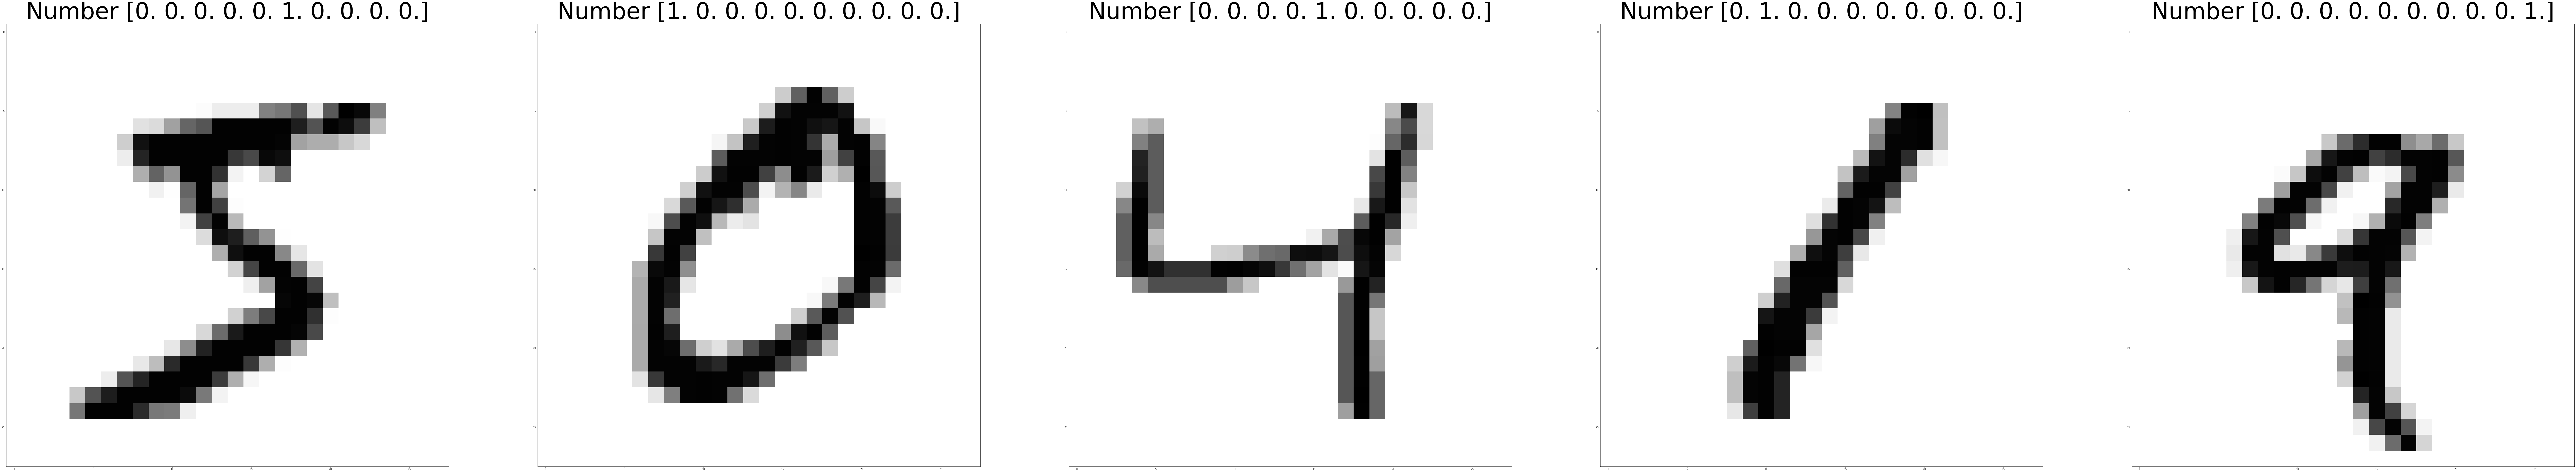

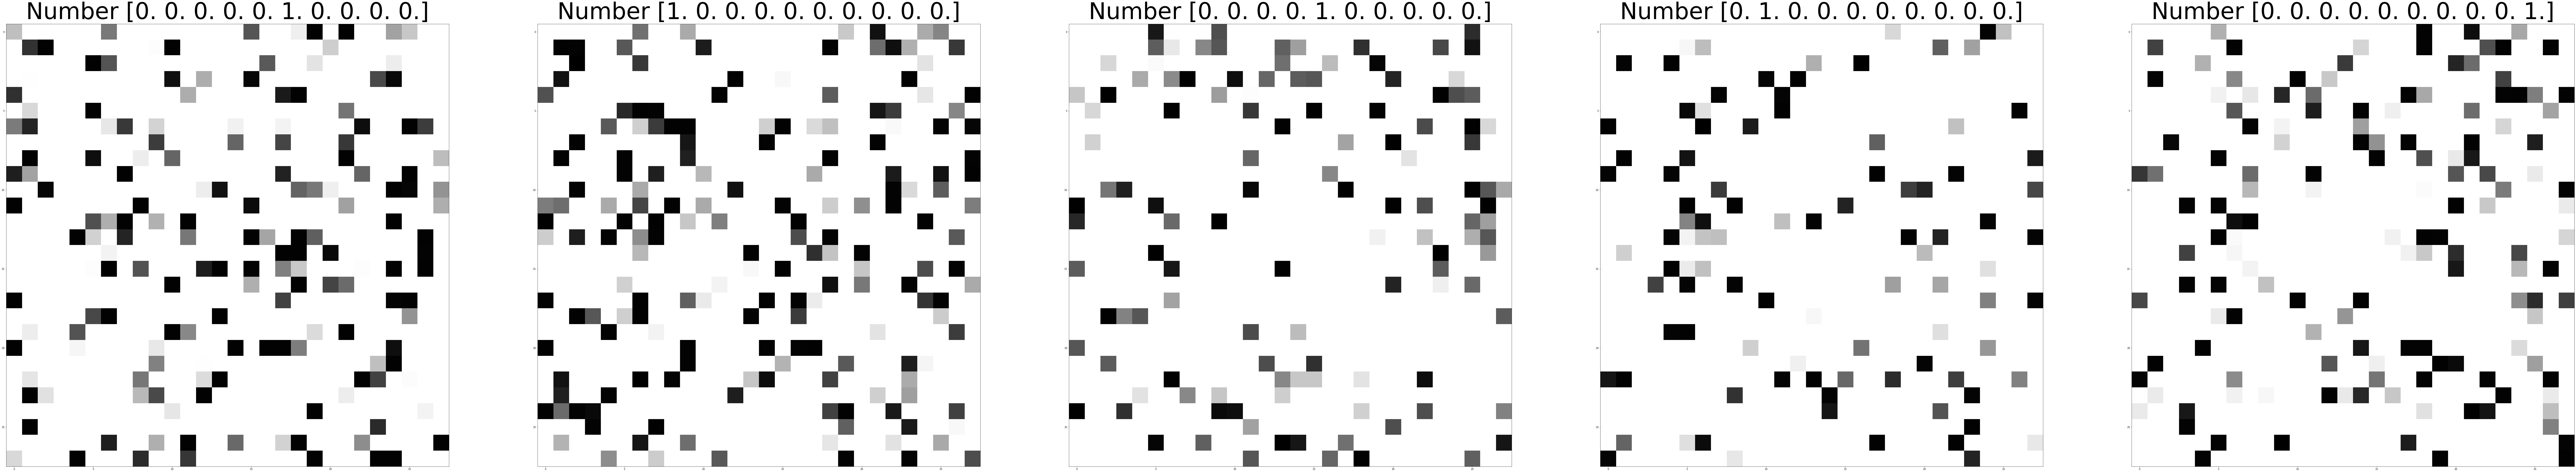

In [44]:
plt.figure(figsize=(200,800))
for i in range(5):
    image = np.array(1-x_train.iloc[i,:]).reshape(28,28)
    plt.subplot(1,5,i+1)
    plt.gca().set_title("Number {}".format(y_train[i]),fontsize=100)
    
    plt.imshow(image,cmap="gray",interpolation="none")

plt.show()
plt.figure(figsize=(200,800))

for i in range(5):
    image = np.array(1-x_permuted_train.iloc[i,:]).reshape(28,28)
    plt.subplot(1,5,i+1)
    plt.gca().set_title("Number {}".format(y_train[i]),fontsize=100)
    
    plt.imshow(image,cmap="gray",interpolation="none")
    
    
plt.show()

To check we didn't messed up somewhere. Ideally both plot should be exactly the same, will just check visually. 

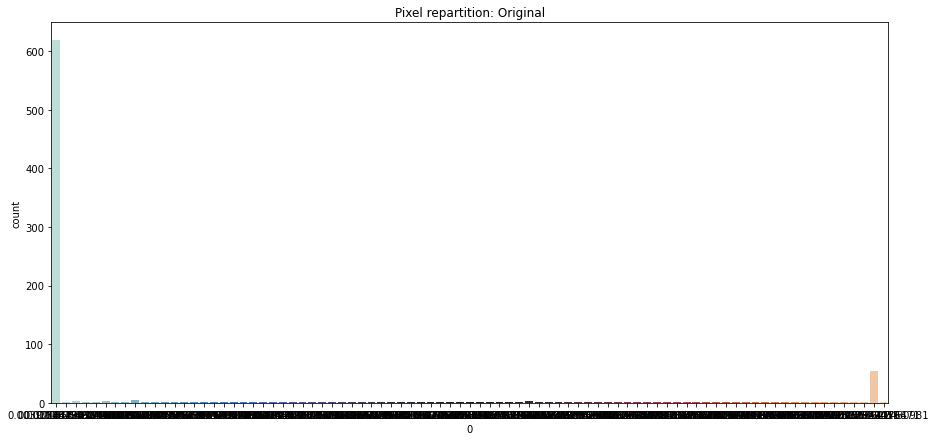

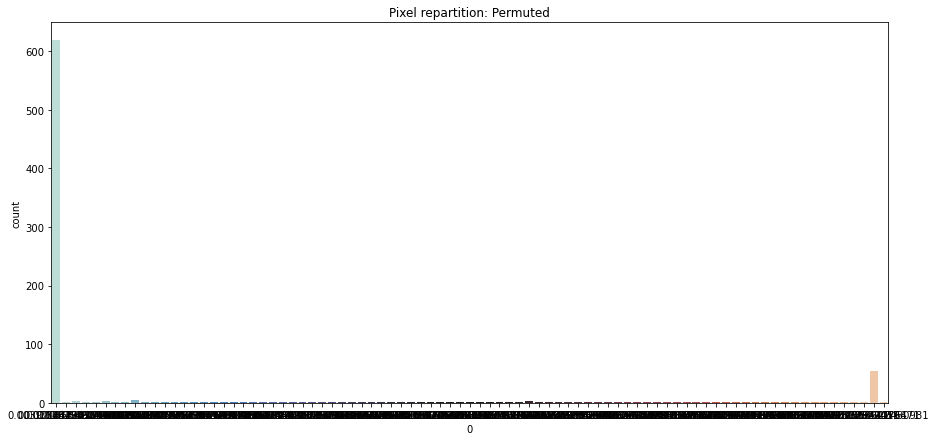

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x=x_train.iloc[0,:],palette="icefire")
plt.title('Pixel repartition: Original')
plt.show()

plt.figure(figsize=(15,7))
sns.countplot(x=x_permuted_train.iloc[0,:],palette="icefire")
plt.title('Pixel repartition: Permuted')
plt.show()

Seems correct, we now have our original dataset and the permuted one. The same permutation was applied to the test set as well

## Models to test

I'll just select one CNN architecture and one promising MLP architecture

### MLP

Following the analysis done for the MLP "784x64x64x32x10" seems like an architecture with quite "few" parameters, but great performance

In [46]:
mlp_normal = Sequential(
    [
        Dense(64, input_shape=(784,), activation='relu'), 
        Dense(64, activation='relu'),
        Dense(32, activation='relu'), 
        Dense(10, activation='softmax'),
    ]
)

mlp_normal.summary()

mlp_normal.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_66 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                330       
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [47]:
mlp_permuted = Sequential(
    [
        Dense(64, input_shape=(784,), activation='relu'), 
        Dense(64, activation='relu'),
        Dense(32, activation='relu'), 
        Dense(10, activation='softmax'),
    ]
)

mlp_permuted.summary()

mlp_permuted.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
batch_size = 512
epochs = 50


histories_mlp = dict()

history = mlp_normal.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=0)
histories_mlp["mlp_normal"] = history

print("Finish training classic MNIST")

history = mlp_permuted.fit(x_permuted_train,y_train,batch_size=batch_size,epochs=epochs,verbose=0)
histories_mlp["mlp_permuted"] = history

print("Finish training permuted MNIST")

Finish training classic MNIST
Finish training permuted MNIST


In [71]:
def plot_history(history, model,ax=None):
    if ax is None: fig,axs=plt.subplots(len(history.history.keys()),constrained_layout = True)
    for i,k in enumerate(history.history.keys()):
        axs[i].plot(history.history[k])
        plt.title("Model: {}".format(model))
        axs[i].set(xlabel='epochs', ylabel=f'{k}')
        axs[i].legend(['train', 'test'], loc='upper left')

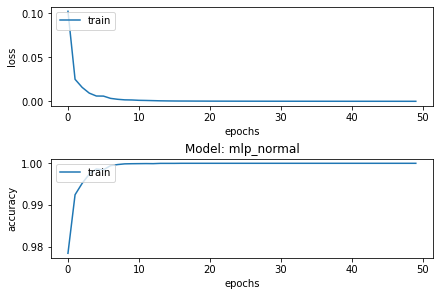

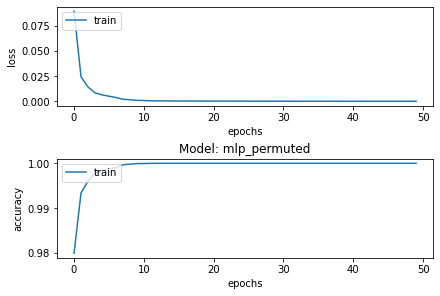

In [73]:
for name,history in histories_mlp.items():
    plot_history(history,name)

In [64]:
print("MLP trained on classic MNIST and test on classic MNIST: {} %".format(mlp_normal.evaluate(x=x_test,y=y_test,verbose=0)[1]*100))
print("MLP trained on classic MNIST and test on permuted MNIST: {} %".format(mlp_normal.evaluate(x=x_permuted_test,y=y_test,verbose=0)[1]*100))
print("MLP trained on permuted MNIST and test on classic MNIST: {} %".format(mlp_permuted.evaluate(x=x_test,y=y_test,verbose=0)[1]*100))
print("MLP trained on permuted MNIST and test on permuted MNIST: {} %".format(mlp_permuted.evaluate(x=x_permuted_test,y=y_test,verbose=0)[1]*100))

MLP trained on classic MNIST and test on classic MNIST: 97.57000207901001 %
MLP trained on classic MNIST and test on permuted MNIST: 9.97999981045723 %
MLP trained on permuted MNIST and test on classic MNIST: 8.739999681711197 %
MLP trained on permuted MNIST and test on permuted MNIST: 97.57999777793884 %


### CNN

Similarly, for the CNN, we'll do simply a model with 2 convolution layers, and the kernel of size (5,5), which seemed like the best of the 2 layers CNN.  

In [65]:
num_classes = 10
input_shape = (28, 28, 1)

In [66]:
cnn_normal = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

cnn_normal.summary()

cnn_normal.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)            

In [67]:
cnn_permuted = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3),padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ]
)

cnn_permuted.summary()

cnn_permuted.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)            

In [68]:
batch_size = 512
epochs = 50


histories_cnn = dict()

history = cnn_normal.fit(x_train_reshaped,y_train,batch_size=batch_size,epochs=epochs,verbose=0)
histories_cnn["cnn_normal"] = history

print("Finish training classic MNIST")

history = cnn_permuted.fit(x_train_permuted_reshaped,y_train,batch_size=batch_size,epochs=epochs,verbose=0)
histories_cnn["mlp_permuted"] = history

print("Finish training permuted MNIST")

Finish training classic MNIST
Finish training permuted MNIST


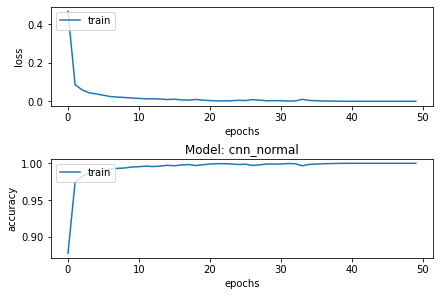

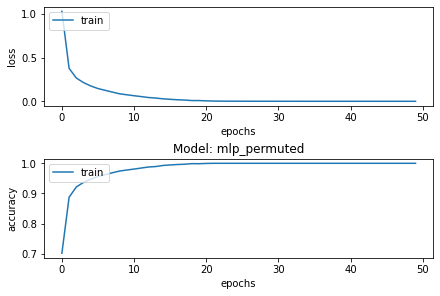

In [70]:
for name,history in histories_cnn.items():
    plot_history(history,name)

In [74]:
print("CNN trained on classic MNIST and test on classic MNIST: {} %".format(cnn_normal.evaluate(x=x_test_reshaped,y=y_test,verbose=0)[1]*100))
print("CNN trained on classic MNIST and test on permuted MNIST: {} %".format(cnn_normal.evaluate(x=x_test_permuted_reshaped,y=y_test,verbose=0)[1]*100))
print("CNN trained on permuted MNIST and test on classic MNIST: {} %".format(cnn_permuted.evaluate(x=x_test_reshaped,y=y_test,verbose=0)[1]*100))
print("CNN trained on permuted MNIST and test on permuted MNIST: {} %".format(cnn_permuted.evaluate(x=x_test_permuted_reshaped,y=y_test,verbose=0)[1]*100))

CNN trained on classic MNIST and test on classic MNIST: 99.27999973297119 %
CNN trained on classic MNIST and test on permuted MNIST: 10.050000250339508 %
CNN trained on permuted MNIST and test on classic MNIST: 5.590000003576279 %
CNN trained on permuted MNIST and test on permuted MNIST: 97.10999727249146 %
